
Submitted by - Manisha Biswas, Email: mbiswas2@buffalo.edu

#### Part 1: Draw the moral graph, triangulated graph and the junction tree. Explain why the "running intersection property" is satisfied in your junction tree.

#### Importing libraries for Probabilistic Graph Models

In [8]:
import pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import numpy as np
import networkx as nx
import pylab as plt
import warnings
warnings.filterwarnings('ignore')
import IPython
from IPython.display import Image

#### Create a Bayesian Model using the pgmpy library
#### Create the graph by defining the edges of the graph in a list.
#### Then define all the conditional probability densities.
#### Then add all dependencies to the model.

In [9]:
graph_model = BayesianModel([('asia', 'tub'),
                                    ('tub', 'either'),
                                    ('smoke', 'lung'),
                                    ('smoke', 'bronc'),
                                    ('lung', 'either'),
                                    ('either', 'xray'),
                                    ('either', 'dysp'),
                                    ('bronc', 'dysp')])

cpd_asia = TabularCPD(variable='asia', variable_card = 2, 
                      values = [[0.01], [0.99]])

cpd_smoke = TabularCPD(variable='smoke', variable_card = 2, 
                       values = [[0.5], [0.5]])

cpd_tub = TabularCPD(variable='tub', variable_card=2, 
                     values=[[0.05, 0.01],[0.95, 0.99]], 
                     evidence = ['asia'], evidence_card = [2])

cpd_lung = TabularCPD(variable='lung', variable_card=2,
                      values=[[0.1, 0.01],[0.9, 0.99]], 
                      evidence = ['smoke'], evidence_card = [2])

cpd_bronc = TabularCPD(variable='bronc', variable_card=2, 
                       values=[[0.6, 0.3],[0.4, 0.7]], 
                       evidence = ['smoke'], evidence_card = [2])

cpd_either = TabularCPD(variable='either', variable_card=2, 
                        values=[[1, 1, 1, 0],[0, 0, 0, 1]], 
                        evidence = ['tub', 'lung'], evidence_card = [2, 2])

cpd_xray = TabularCPD(variable='xray', variable_card=2, 
                      values=[[0.98, 0.05],[0.02, 0.95]], 
                      evidence = ['either'], evidence_card = [2])

cpd_dysp = TabularCPD(variable='dysp', variable_card=2, 
                      values=[[0.9, 0.7, 0.8, 0.1],[0.1, 0.3, 0.2, 0.9]], 
                      evidence = ['bronc', 'either'], evidence_card = [2, 2])

graph_model.add_cpds(cpd_asia,cpd_smoke,cpd_tub,cpd_lung,cpd_bronc,cpd_either,cpd_xray,cpd_dysp)


### Moralized, Triangulated and Junction Tree Graphs

#### Bayesian Network Model


All Edges in the Bayesian Network Model.

('asia', 'tub')
('tub', 'either')
('either', 'xray')
('either', 'dysp')
('smoke', 'lung')
('smoke', 'bronc')
('lung', 'either')
('bronc', 'dysp')


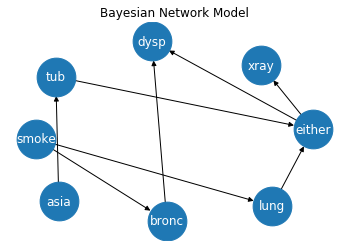

In [7]:
print('All Edges in the Bayesian Network Model.\n')
for edge in graph_model.edges():
    print(edge)
plt.figure()
plt.title('Bayesian Network Model')
nx.draw(graph_model, with_labels=True, node_size=1500, font_size=12, font_color='white')
plt.savefig('Bayesian.png')
plt.show()

#### Moralized Graph.



All edges of Moralized Graph:

('asia', 'tub')
('tub', 'either')
('tub', 'lung')
('either', 'xray')
('either', 'dysp')
('either', 'lung')
('either', 'bronc')
('lung', 'smoke')
('dysp', 'bronc')
('bronc', 'smoke')


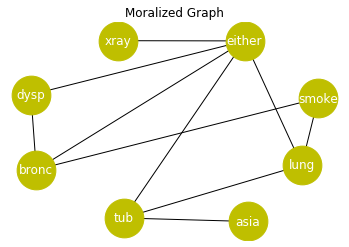

In [8]:
moralize = graph_model.to_markov_model()
print('\n\nAll edges of Moralized Graph:\n')
for edge in moralize.edges():
    print(edge)
plt.figure()
plt.title('Moralized Graph')
nx.draw(moralize, with_labels=True, node_color= 'y', node_size=1500, font_size=12, font_color='white')
plt.savefig('Moralize.png')
plt.show()

#### Trigulated Graph. 



Edges of triangulated graph:

('asia', 'tub')
('asia', 'dysp')
('asia', 'xray')
('asia', 'bronc')
('asia', 'smoke')
('tub', 'either')
('tub', 'lung')
('tub', 'dysp')
('tub', 'xray')
('tub', 'bronc')
('tub', 'smoke')
('either', 'xray')
('either', 'dysp')
('either', 'lung')
('either', 'bronc')
('either', 'smoke')
('lung', 'smoke')
('xray', 'bronc')
('xray', 'smoke')
('xray', 'dysp')
('dysp', 'bronc')
('dysp', 'smoke')
('bronc', 'smoke')


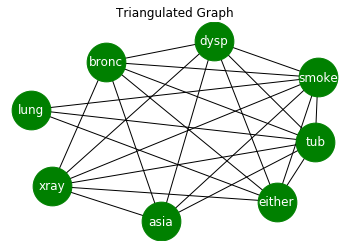

In [9]:
triangulated = moralize.triangulate()
print('\n\nEdges of triangulated graph:\n')
for edge in triangulated.edges():
    print(edge)
plt.figure()
plt.title('Triangulated Graph')
nx.draw(triangulated, with_labels=True, node_color= 'g', node_size=1500, font_size=12, font_color='white')
plt.savefig('Triangulate.png')
plt.show()

#### Junction Tree 



Nodes in the Junction Tree:

('tub', 'smoke', 'asia', 'xray', 'dysp', 'bronc')
('tub', 'smoke', 'either', 'xray', 'dysp', 'bronc')
('tub', 'smoke', 'either', 'lung')


Edges in the Junction Tree:

(('tub', 'smoke', 'asia', 'xray', 'dysp', 'bronc'), ('tub', 'smoke', 'either', 'xray', 'dysp', 'bronc'))
(('tub', 'smoke', 'either', 'xray', 'dysp', 'bronc'), ('tub', 'smoke', 'either', 'lung'))


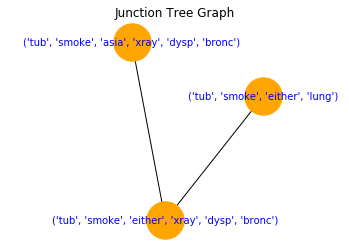

In [10]:
junc_tree = triangulated.to_junction_tree()
print('\n\nNodes in the Junction Tree:\n')
for node in junc_tree.nodes():
    print(node)

print('\n\nEdges in the Junction Tree:\n')    
for edge in junc_tree.edges():
    print(edge)
    
pos = nx.spring_layout(junc_tree)   
plt.figure()
plt.title('Junction Tree Graph')
nx.draw(junc_tree, with_labels=True, node_color= 'orange', node_size=1400, font_size=10, font_color='blue')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.8
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.savefig('juncTree.png')
plt.show()

### Running Intersection Property: 

1) Consider two clusters in the in the junction tree.If these two clusters have a common node, the Running Intersection Property is said to be satisfied if the common node is included in all clusters between the two clusters.

<br>2) In our junction tree, we see that this condition is satisfied.

<br>3) Ex.  For the clusters 
#### {'tub', 'smoke', 'asia', 'xray', 'dysp','bronc'} , 
#### {tub', 'smoke', 'either', 'xray','dysp','bronc'}, 
#### {'tub', 'smoke', 'either', 'lung'}.
<br>We see that {'tub', 'smoke'} is present in the first and last cluster. The fact that {'tub', 'smoke'} is present in the middle cluster as well means that the Running Intersection Property is true for these clusters.
<br> 4) It can be seen that the above is true for all the other nodes of our junction tree as well. Therefore, the junction tree satisfies the running intersection property.

## Part 2 

In [11]:
from pgmpy.inference import VariableElimination

In [12]:
model_inference = VariableElimination(graph_model)
query = model_inference.query(variables=['tub', 'lung','bronc'],evidence={'asia': 0, 'xray': 0}, joint= True)
print('The Joint Probability for {tub, lung, bronc} for the given evidence is ' + str(query))


Eliminating: smoke: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 304.52it/s]


The Joint Probability for {tub, lung, bronc} for the given evidence is +--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0106 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0079 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.1413 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(1) |                0.1778 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(0) |                0.2021 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(1) |                0.1508 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(0) |                0.1370 |
+--------+---------+----------+--

####  The joint probability of {'tub', 'lung', 'bronc'} are 0.0106. 

#### We can draw the Cluster Tree as follows:

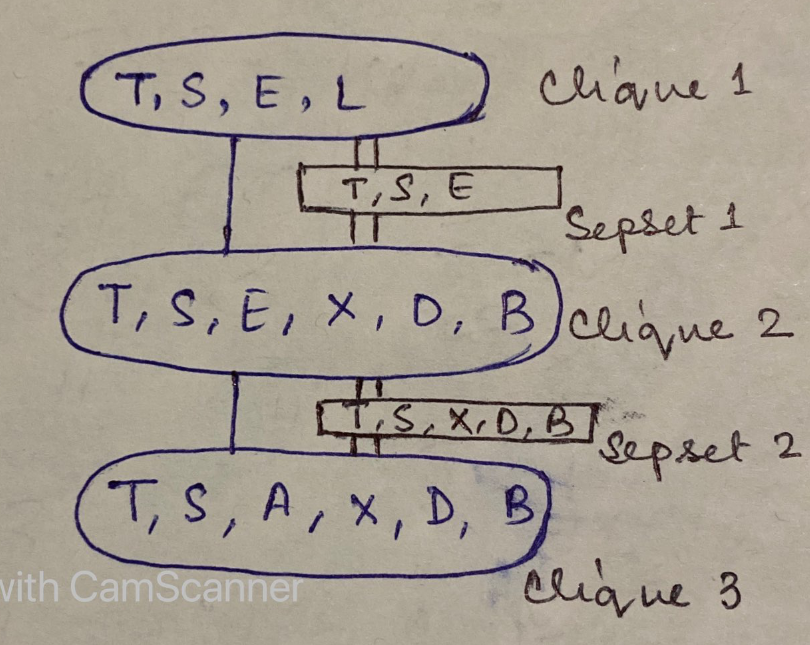

In [7]:
Image(filename = 'img2.png', width = 500, height = 500)


#### As we see in the cluster tree above, the clusters are - 

##### Node 1 : {'tub' , 'smoke' , 'either' , 'lung' }
Common = { 'tub' , 'smoke' , 'either'  }

##### Node 2 : { 'tub' , 'smoke' , 'either' , 'xray' , 'dysp' , 'bronc' }
Common = { 'tub' , 'smoke' , 'xray' , 'dysp' , 'bronc'  }

##### Node 3 : { 'tub' , 'smoke' , 'asia' , 'xray' , 'dysp' , 'bronc' }

#### The equation representing the entire graph is: 

$$p(V ) = p(A) p(T | A) p(S) p(L | S) p(B | S) p(E | T, L) p(D | E, B) p(X | E)$$

#### The Joint Probabilty of the model can be given as - 

$$\Psi_{1}(T, S, E) = \sum_{L} p(L | S)p(E | T, L)$$<br>
$$\Psi_{2}(T, S, X, D, B) = \sum_{E} p(D | E, B) p(X | E) \Psi_{1}(T, S, E)$$ <br>
$$\Psi_{3} = \sum_{T,S,A,X,D,B} p(A) p(T | A) p(S) p(B | S) \Psi_{2}(T, S, X, D, B)$$ <br>



Iteration 1: 
Initially, the message will be passed from Node 1 and 2. L is the only different element.We Marginalized over L.

Iteration 2:
Then, Message will be passed from Node 2 to Node 3. We marginalized over E <br><br>
Iteration 3:
Finally, Message will be passed from Node 3 to Node 1. We Marginalized over T,S,A,X,D,B<br>

#### After Iteration 3, We backpropargate so that all the clusters have the marginals.  

References: 
1. Building Probabilistic Graphical Models with Python by Kiran R Karkera
2. https://ermongroup.github.io/cs228-notes/inference/jt/
3. https://www.youtube.com/watch?v=FDNB0A61PGE
4. https://vv.cs.byu.edu/facwiki/scraped-cs677sp10/cs677sp10/index.php/Clique_Trees.html
5. https://github.com/siddheswarc/Pattern-Recognition/tree/master/Project%203
6. Introduction to Probability Theory by Mark Paskin